In [ ]:
!pip install resnet50-pynq

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Processing /root/.cache/pip/wheels/90/31/46/95d9cd4c94805780eea2f0ace972b9a66b163120ecc83d1458/pynq-2.6.2-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 8.2MB 4.1MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 389kB 34.5MB/s 
     |████████████████████████████████| 430kB 38.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
  Created wheel for resnet50-pynq: filename=resnet50_pynq-1.1-cp37-none-any.whl size=1750374 sha256=a758da15cf192fe19503241e9e6d6a49bf24bc053feef041bc4c2eba0a255c47
  Stored in directory: /root/.cache/pip/wheels/cc/a2/45/c1fb55f2537a07fd5e2bfd4accb02511ea4eb55060eb1442de
Successfully built resnet50-pynq
  Created wheel for wget: filename=wget-3.2-cp37-non

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import pickle
import cv2
import os
from glob import glob
from pickle import dump, load

In [3]:


images_path = '/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Images/'
images = glob(images_path+'*.jpg')
len(images)



9188

In [4]:
images[:5]

['/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Images/8993.jpg',
 '/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Images/8998.jpg',
 '/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Images/9000.jpg',
 '/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Images/8999.jpg',
 '/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Images/9001.jpg']

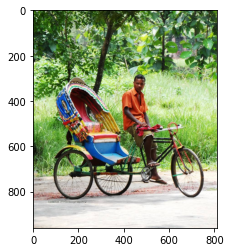

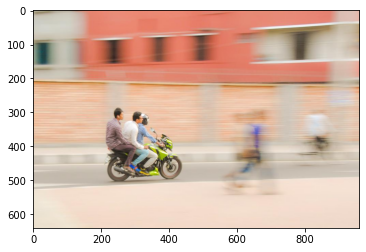

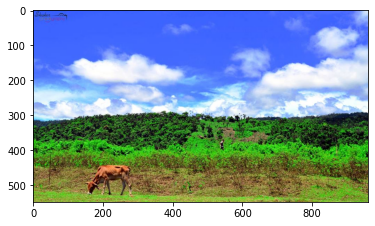

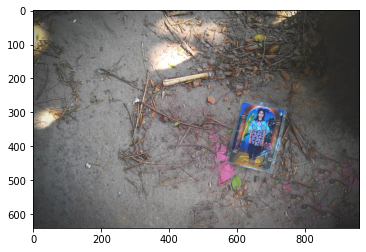

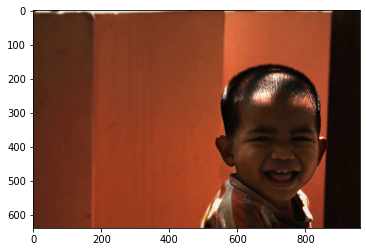

In [5]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [6]:
#from keras.applications import ResNet50
from keras.applications.resnet50 import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [7]:
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


In [9]:

images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count == 5000:
        break
        
    elif count % 500 == 0:
        print(count)



500
1000
1500
2000
2500
3000
3500
4000
4500


In [10]:
len(images_features)

5000

In [11]:
images_features

{'8993.jpg': array([0.09316903, 0.467689  , 0.15125142, ..., 1.0553056 , 1.8344222 ,
        0.19558813], dtype=float32),
 '8998.jpg': array([0.31295738, 0.44754285, 0.49765947, ..., 0.075009  , 0.4760278 ,
        0.0454223 ], dtype=float32),
 '9000.jpg': array([0.17835261, 0.07134105, 0.50404894, ..., 0.07644052, 0.        ,
        0.15223944], dtype=float32),
 '8999.jpg': array([1.4567862e-03, 2.6177714e+00, 1.4797465e-02, ..., 1.0654925e+00,
        5.2008444e-01, 0.0000000e+00], dtype=float32),
 '9001.jpg': array([1.0781559 , 0.6253103 , 0.22621912, ..., 0.07831786, 0.05713135,
        0.06962661], dtype=float32),
 '9005.jpg': array([0.082068  , 0.9125181 , 0.        , ..., 0.        , 0.23971477,
        1.6420373 ], dtype=float32),
 '9004.jpg': array([1.0624512 , 0.2796656 , 1.9999471 , ..., 0.0660071 , 0.0468658 ,
        0.01031385], dtype=float32),
 '9003.jpg': array([0.40383267, 1.9538599 , 0.        , ..., 2.1735487 , 0.13091356,
        0.10830451], dtype=float32),
 '9002

In [12]:
caption_path = '/content/drive/MyDrive/All DataSet for Bangla Image Captioning Project/Bangla Contextual/Captions.txt'

In [13]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [14]:
captions

['1.jpg#0\t\tতিন জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর দুই জন বসে আছে।',
 '1.jpg#1\t\tএকটি হলুদ জামা পায়জামা পরা মহিলা দাড়িয়ে হাতে একটি বেত নিয়ে পিটানোর ভাব দেখাচ্ছে আর ছোট একটি মেয়ে পিছনে ব্যাগ নিয়ে বসে কাঁদছে।',
 '2.jpg#0\t\tঅনেক মেয়ে মানুষ বসে আছে।',
 '2.jpg#1\t\tএকটি নীল জামা পরা মহিলা একটি নীল ল্যাপটপ এর দিকে তাকিয়ে আছে এবং পিছনেতার দিকে বসে শারি পরে তাকিয়ে আছে অনেকগুলো মহিলা।',
 '3.jpg#0\t\tঅনেক মানুষ একসাথে বসে কাজ করছে।',
 '3.jpg#1\t\t২ টিছোট ছেলে একজন শার্ট প্যান্টদাড়িয়ে চেয়ে আছে আরেকজন বসে গার্মেন্টস এ কাজ করছে নীলশার্ট পরে তাদের পিছনে অনেকগুলো মহিলা বসে দাড়িয়ে কাজ করছে',
 '4.jpg#0\t\tছয় জন মানুষ দাড়িয়ে আছে।',
 '4.jpg#1\t\t৬ জন মানুষ এলোমেলো দাড়িয়ে আছে, তাদের মাঝে ২ জন ছেলে ৪ জন পুরুষ,তাদের একজন লুঙ্গী পরে দাড়িয়ে আছে।',
 '5.jpg#0\t\tএক জন মেয়ে মানুষ মাথায় ঘোমটা দিয়ে কাজ করছে। মাটিতে বিভিন্ন রঙের মসলা আছে।',
 '5.jpg#1\t\tএকটি মহিলা হালকা পানির উপরে দাড়িয়ে আছে শারি পরে, মহিলার মুখ ডানদিকে ঘুরানো, পানির রং হলুদ দেখাচ্ছে।',
 '6.jpg#0\t\tআবছা অন্ধকারে এক জন মানুষ দাড়িয়ে আছে। পিছন

In [15]:
len(captions)

18309

In [16]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [17]:
captions_dict

{'1912.jpg': ['একটা ছোট ছেলে হলুদ রঙের টিশার্ট, জিন্স ও মাথায়লাল রঙের হেলমেট পরে হলুদ রঙের একটা সাইকেল চালাচ্ছে আর পিছন থেকে একটা লোক সাইকেলটা ধাক্কা দিচ্ছে।',
  'একজন বালক সাইকেল চালাচ্ছে। পিছনে একজন সাইকেল ঠেলছে'],
 '1913.jpg': ['তিনজন লোক একসাথে দাঁড়িয়ে আছে যার মধ্যে বামপাশের জনের পড়নে একটা সোয়েটার ও জিন্স মুখে ছোট ছোট দাড়িগোঁফ, মাঝেরে জনের পরনে স্যুট-টাই ও ডানপাশের জনের পড়নে জ্যাকেট। ',
  'তিনজন পুরুষ পাশাপাশি দাড়িয়ে আছে'],
 '1914.jpg': ['গোলাপি রঙের জামা ও হাতে লাল-সবুজ পতাকা মাথায় ধরে সরিষা ক্ষেতের হলুদ ফুলের সারির মাঝে একটা মেয়ে হাঁসিমুখে দাঁড়িয়ে আছে।',
  'একজন মেয়ে শিশু পতাকা ধরে আছে'],
 '1915.jpg': ['তিনজন মহিলা ও একজন পুরুষ একসাথে দাঁড়িয়ে আছে আর তাদের পিছনে আশেপাশে আর কয়েকজন মহিলা পুরুষ হাঁটাহাঁটি করছে। ',
  'ততিনজন নারী ও একজন পুরুষ পাশাপাশি দাড়িয়ে আছে'],
 '1916.jpg': ['একটা লোক হাতের মধ্যে দুই টাকার নোট নিয়ে দুই হাত পেতে রেখেছে। ',
  'দুইটি হাত আছে। হাতে টাকা আছে'],
 '1917.jpg': ['সমাবর্তন অনুষ্ঠানে একজন মহিলা শিল্পী গান গাচ্ছে আর তার পেছনে শিল্পীর সহযোগীরা বাদ্যযন্ত্র বাজা

In [18]:
len(captions_dict)

4986

In [19]:
def preprocessed(txt):
    modified = txt
    modified = 'startofseq ' + modified + ' endofseq'
    return modified



In [20]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [21]:
captions_dict

{'1912.jpg': ['startofseq একটা ছোট ছেলে হলুদ রঙের টিশার্ট, জিন্স ও মাথায়লাল রঙের হেলমেট পরে হলুদ রঙের একটা সাইকেল চালাচ্ছে আর পিছন থেকে একটা লোক সাইকেলটা ধাক্কা দিচ্ছে। endofseq',
  'startofseq একজন বালক সাইকেল চালাচ্ছে। পিছনে একজন সাইকেল ঠেলছে endofseq'],
 '1913.jpg': ['startofseq তিনজন লোক একসাথে দাঁড়িয়ে আছে যার মধ্যে বামপাশের জনের পড়নে একটা সোয়েটার ও জিন্স মুখে ছোট ছোট দাড়িগোঁফ, মাঝেরে জনের পরনে স্যুট-টাই ও ডানপাশের জনের পড়নে জ্যাকেট।  endofseq',
  'startofseq তিনজন পুরুষ পাশাপাশি দাড়িয়ে আছে endofseq'],
 '1914.jpg': ['startofseq গোলাপি রঙের জামা ও হাতে লাল-সবুজ পতাকা মাথায় ধরে সরিষা ক্ষেতের হলুদ ফুলের সারির মাঝে একটা মেয়ে হাঁসিমুখে দাঁড়িয়ে আছে। endofseq',
  'startofseq একজন মেয়ে শিশু পতাকা ধরে আছে endofseq'],
 '1915.jpg': ['startofseq তিনজন মহিলা ও একজন পুরুষ একসাথে দাঁড়িয়ে আছে আর তাদের পিছনে আশেপাশে আর কয়েকজন মহিলা পুরুষ হাঁটাহাঁটি করছে।  endofseq',
  'startofseq ততিনজন নারী ও একজন পুরুষ পাশাপাশি দাড়িয়ে আছে endofseq'],
 '1916.jpg': ['startofseq একটা লোক হাতের মধ্যে দুই টাকার নোট নি

In [22]:

count_words = {}
count = 1
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
              count_words[word] = count
              count += 1



In [23]:
len(count_words)

4259

In [24]:
count_words

{'startofseq': 1,
 'একটা': 2,
 'ছোট': 3,
 'ছেলে': 4,
 'হলুদ': 5,
 'রঙের': 6,
 'টিশার্ট,': 7,
 'জিন্স': 8,
 'ও': 9,
 'মাথায়লাল': 10,
 'হেলমেট': 11,
 'পরে': 12,
 'সাইকেল': 13,
 'চালাচ্ছে': 14,
 'আর': 15,
 'পিছন': 16,
 'থেকে': 17,
 'লোক': 18,
 'সাইকেলটা': 19,
 'ধাক্কা': 20,
 'দিচ্ছে।': 21,
 'endofseq': 22,
 'একজন': 23,
 'বালক': 24,
 'চালাচ্ছে।': 25,
 'পিছনে': 26,
 'ঠেলছে': 27,
 'তিনজন': 28,
 'একসাথে': 29,
 'দাঁড়িয়ে': 30,
 'আছে': 31,
 'যার': 32,
 'মধ্যে': 33,
 'বামপাশের': 34,
 'জনের': 35,
 'পড়নে': 36,
 'সোয়েটার': 37,
 'মুখে': 38,
 'দাড়িগোঁফ,': 39,
 'মাঝেরে': 40,
 'পরনে': 41,
 'স্যুট-টাই': 42,
 'ডানপাশের': 43,
 'জ্যাকেট।': 44,
 'পুরুষ': 45,
 'পাশাপাশি': 46,
 'দাড়িয়ে': 47,
 'গোলাপি': 48,
 'জামা': 49,
 'হাতে': 50,
 'লাল-সবুজ': 51,
 'পতাকা': 52,
 'মাথায়': 53,
 'ধরে': 54,
 'সরিষা': 55,
 'ক্ষেতের': 56,
 'ফুলের': 57,
 'সারির': 58,
 'মাঝে': 59,
 'মেয়ে': 60,
 'হাঁসিমুখে': 61,
 'আছে।': 62,
 'শিশু': 63,
 'মহিলা': 64,
 'তাদের': 65,
 'আশেপাশে': 66,
 'কয়েকজন': 67,
 'হাঁটাহাঁটি': 68,
 'করছে।': 69,
 'ততিন

In [25]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            encoded.append(count_words[word])


        captions_dict[k][vv.index(v)] = encoded

In [26]:
captions_dict

{'1912.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   6,
   11,
   12,
   5,
   6,
   2,
   13,
   14,
   15,
   16,
   17,
   2,
   18,
   19,
   20,
   21,
   22],
  [1, 23, 24, 13, 25, 26, 23, 13, 27, 22]],
 '1913.jpg': [[1,
   28,
   18,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   2,
   37,
   9,
   8,
   38,
   3,
   3,
   39,
   40,
   35,
   41,
   42,
   9,
   43,
   35,
   36,
   44,
   22],
  [1, 28, 45, 46, 47, 31, 22]],
 '1914.jpg': [[1,
   48,
   6,
   49,
   9,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   5,
   57,
   58,
   59,
   2,
   60,
   61,
   30,
   62,
   22],
  [1, 23, 60, 63, 52, 54, 31, 22]],
 '1915.jpg': [[1,
   28,
   64,
   9,
   23,
   45,
   29,
   30,
   31,
   15,
   65,
   26,
   66,
   15,
   67,
   64,
   45,
   68,
   69,
   22],
  [1, 70, 71, 9, 23, 45, 46, 47, 31, 22]],
 '1916.jpg': [[1, 2, 18, 72, 33, 73, 74, 75, 76, 73, 77, 78, 79, 22],
  [1, 80, 77, 62, 50, 81, 31, 22]],
 '1917.jpg': [[1, 82, 83, 23,

In [27]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences



In [29]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 6, 11, 12, 5, 6, 2, 13, 14, 15, 16, 17, 2, 18, 19, 20, 21, 22]
[1, 28, 18, 29, 30, 31, 32, 33, 34, 35, 36, 2, 37, 9, 8, 38, 3, 3, 39, 40, 35, 41, 42, 9, 43, 35, 36, 44, 22]
[1, 2, 201, 121, 202, 384, 87, 33, 385, 304, 242, 23, 18, 318, 192, 31, 386, 23, 247, 304, 242, 18, 387, 118, 388, 389, 118, 30, 62, 22]
[1, 569, 229, 301, 1115, 524, 738, 108, 873, 1116, 1117, 15, 201, 2, 1118, 202, 621, 1119, 159, 18, 192, 31, 15, 197, 590, 115, 2, 4, 116, 136, 22]
[1, 449, 450, 425, 452, 944, 3850, 3851, 15, 377, 419, 115, 2, 18, 454, 53, 116, 3852, 113, 23, 18, 454, 76, 30, 31, 15, 2, 454, 146, 285, 12, 31, 22]


In [30]:
MAX_LEN

33

In [31]:
VOCAB_SIZE = len(count_words)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE + 1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [32]:
X, y_in, y_out = generator(images_features, captions_dict)

In [33]:
len(X), len(y_in), len(y_out)

(88646, 88646, 88646)

In [34]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [35]:
X.shape, y_in.shape, y_out.shape

((88646, 2048), (88646, 33), (88646, 4260))

In [36]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [37]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words) + 1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)


model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 33, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 128)           545280    
_________________________________________________________________
lstm (LSTM)                  (None, 33, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 33, 128)           32896     
Total params: 972,416
Traina

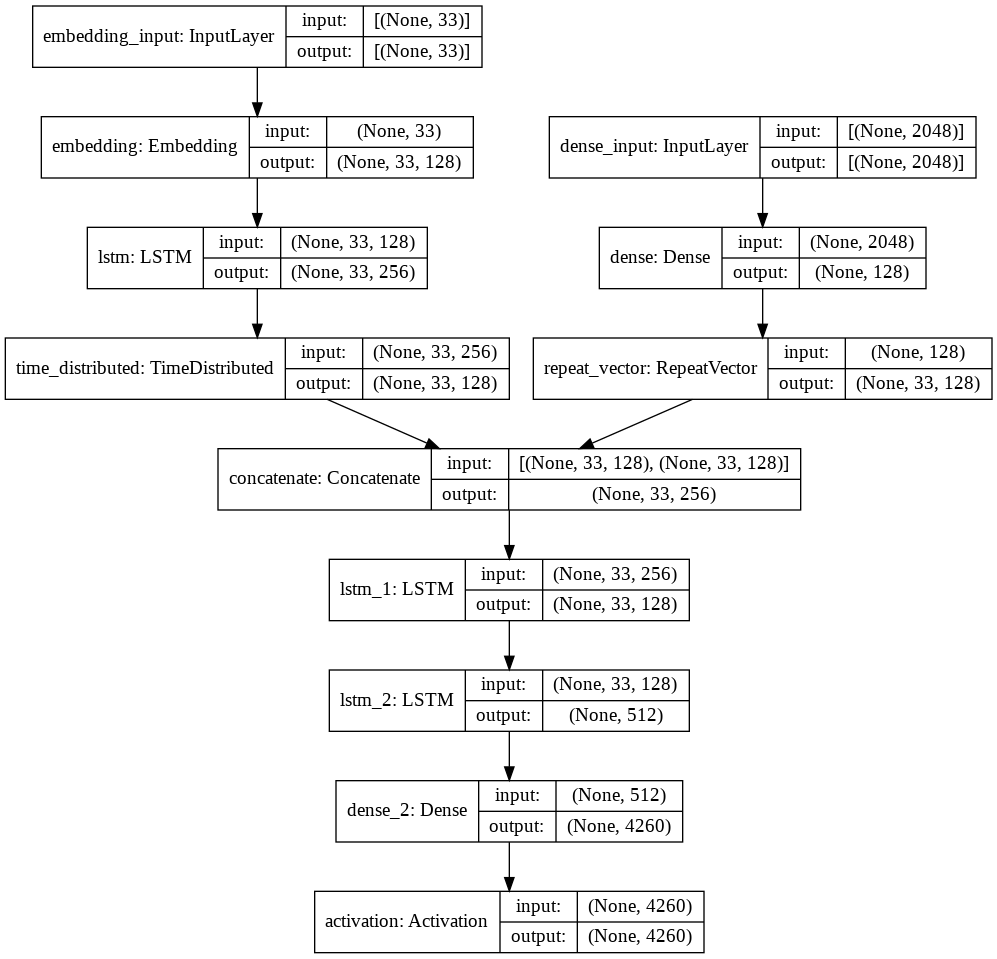

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [39]:
history = model.fit([X, y_in], y_out, batch_size=512, epochs=30)

Epoch 1/30
174/174 [==============================] - 823s 5s/step - loss: 5.7606 - accuracy: 0.1078
Epoch 2/30
174/174 [==============================] - 805s 5s/step - loss: 5.3253 - accuracy: 0.1216
Epoch 3/30
174/174 [==============================] - 802s 5s/step - loss: 4.9468 - accuracy: 0.1683
Epoch 4/30
174/174 [==============================] - 798s 5s/step - loss: 4.6710 - accuracy: 0.1980
Epoch 5/30
174/174 [==============================] - 802s 5s/step - loss: 4.4981 - accuracy: 0.2131
Epoch 6/30
174/174 [==============================] - 800s 5s/step - loss: 4.3507 - accuracy: 0.2294
Epoch 7/30
174/174 [==============================] - 800s 5s/step - loss: 4.1552 - accuracy: 0.2465
Epoch 8/30
174/174 [==============================] - 799s 5s/step - loss: 3.9114 - accuracy: 0.2757
Epoch 9/30
174/174 [==============================] - 800s 5s/step - loss: 3.7249 - accuracy: 0.2978
Epoch 10/30
174/174 [==============================] - 806s 5s/step - loss: 3.5864 - accura

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

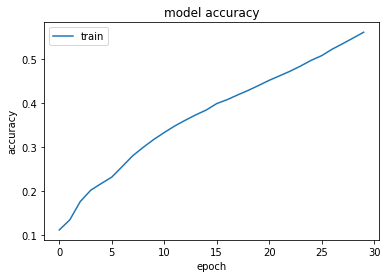

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

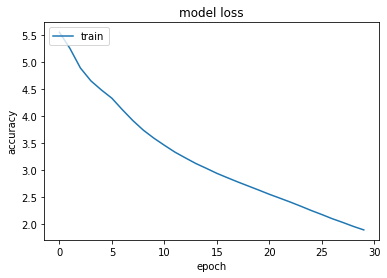

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [43]:
model.save("/content/drive/MyDrive/ICM/model.h5")

In [44]:
model.save_weights("/content/drive/MyDrive/ICM/mine_model_weights.h5")

In [43]:
inv_dict = {v:k for k, v in count_words.items()}

In [47]:
np.save("/content/drive/MyDrive/ICM/vocab.npy", count_words)

In [ ]:
from keras.models import load_model
m = load_model("/content/drive/MyDrive/ICM/model.h5")

In [52]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [46]:
for i in range(15):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(count_words[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        
            
        if sampled_word == 'endofseq':
            break
        else:
          caption = caption + ' ' + sampled_word

        text_inp.append(sampled_word)
    

    
    display(Image.open(test_img_path))    
    print(caption)

Output hidden; open in https://colab.research.google.com to view.